In [1]:
import zarr
import zarr.storage
import s3fs
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_1d_profiles(profiles: xr.Dataset):
    """Helper function for plotting 1D profiles"""
    n = int(np.ceil(len(profiles.data_vars) / 2))
    fig, axes = plt.subplots(n, 2, figsize=(10, 2*n))
    axes = axes.flatten()

    for i, name in enumerate(profiles.data_vars.keys()):
        profiles[name].plot(x='time', ax=axes[i])

    for ax in axes:
        ax.grid('on', alpha=0.5)
        ax.set_xlim(profiles.time.min(), profiles.time.max())

    plt.tight_layout()

In [5]:
shot_id = 30421
# endpoint_url = 'https://s3.echo.stfc.ac.uk'
# url = f's3://mast/test/level2/shots/{shot_id}.zarr'
# fs = s3fs.S3FileSystem(anon=True, endpoint_url=endpoint_url)
# store =zarr.storage.FSStore(fs=fs, url=url)

store = zarr.storage.DirectoryStore(f'/common/tmp/sjackson/upload-tmp/zarr/level2/{shot_id}.zarr')

### Pulse Schedule Profiles

<xarray.Dataset> Size: 574kB
Dimensions:             (time: 23896)
Coordinates:
  * time                (time) float64 191kB -1.977 -1.977 ... 3.996 3.997
Data variables:
    ref_plasma_current  (time) float64 191kB dask.array<chunksize=(23896,), meta=np.ndarray>
    ref_plasma_density  (time) float64 191kB dask.array<chunksize=(23896,), meta=np.ndarray>
Attributes:
    description:  
    imas:         pulse_schedule
    label:        /xdc/ip/t/ipref
    name:         pulse_schedule
    uda_name:     /xdc/ip/t/ipref
    units:        MA

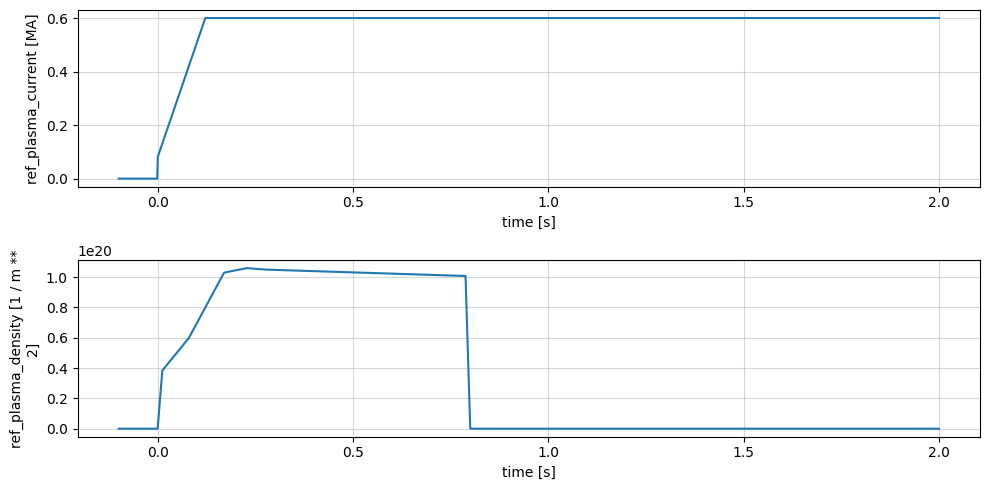

In [51]:
profiles = xr.open_zarr(store, group='pulse_schedule')

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes = axes.flatten()
profiles['ref_plasma_current'].plot(x='time', ax=axes[0])
profiles['ref_plasma_density'].plot(x='time', ax=axes[1])
# profiles['vertical_control'].plot(x='time', ax=axes[2])

# for i in range(len(profiles.gas_channel)):
#     profiles['gas'].isel(gas_channel=i).plot(x='time', ax=axes[3])

for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()

profiles

### Summary Profiles

<xarray.Dataset> Size: 256kB
Dimensions:              (time: 2906)
Coordinates:
  * time                 (time) float64 23kB -0.0612 -0.06095 ... 0.6648 0.665
Data variables:
    gas_inboard_total    (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    gas_outboard_total   (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    gas_pressure         (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    ip                   (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    line_average_n_e     (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    nbi_power            (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    neutron_rates_total  (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    power_radiated       (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    sol_current          (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    volume_average_n_e   (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
Attributes:
    description:  
    imas:         summary.global_quantities.ip
    label:        Plasma Current
    name:         summary
    uda_name:     AMC_PLASMA CURRENT
    units:        kA

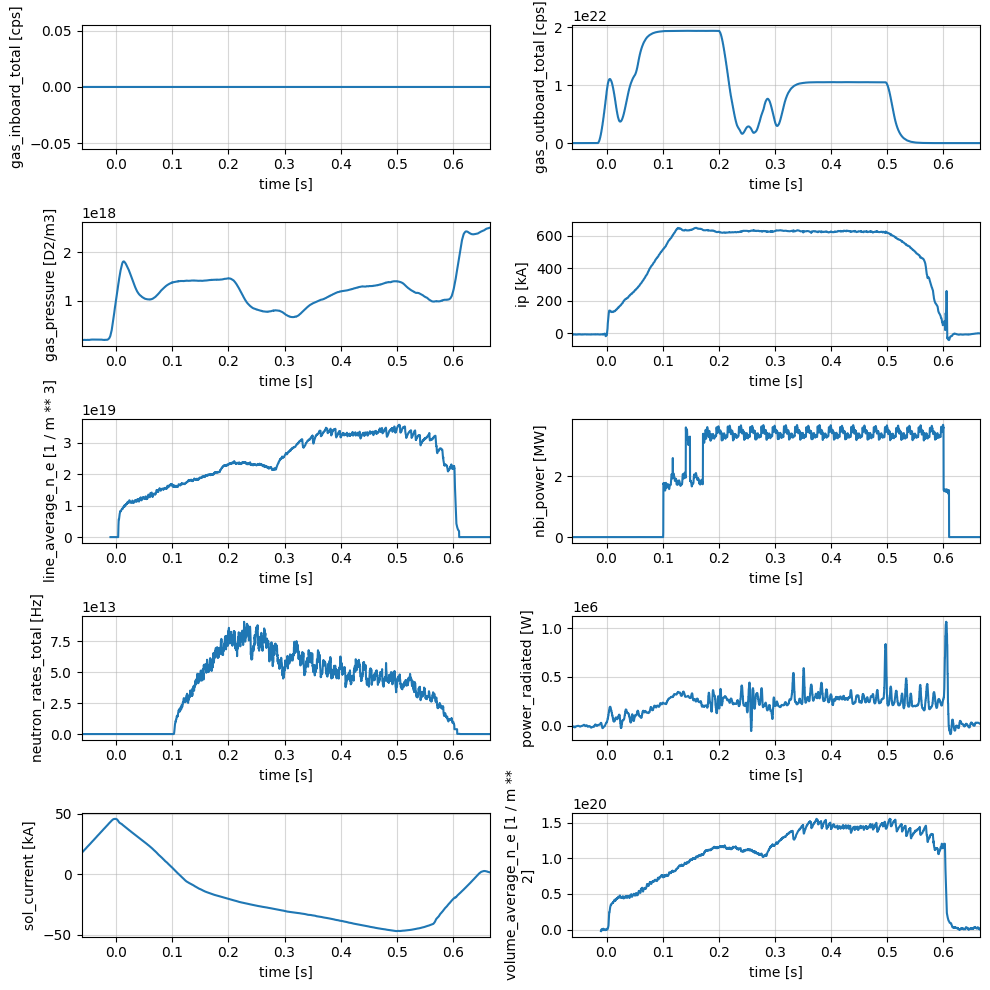

In [8]:
profiles = xr.open_zarr(store, group='summary')

plot_1d_profiles(profiles)
profiles

### Magnetics

<xarray.Dataset> Size: 4MB
Dimensions:                    (b_field_pol_probe_channel: 57, time: 3633,
                                b_field_tor_probe_channel: 8,
                                flux_loop_channel: 15, rogowski_coil_channel: 48)
Coordinates:
  * b_field_pol_probe_channel  (b_field_pol_probe_channel) <U10 2kB 'AMB_CCBV...
  * b_field_tor_probe_channel  (b_field_tor_probe_channel) <U11 352B 'ASM_SAD...
  * flux_loop_channel          (flux_loop_channel) <U12 720B 'AMB_FL/CC03' .....
  * rogowski_coil_channel      (rogowski_coil_channel) <U16 3kB 'AMH_HALO/CCU...
  * time                       (time) float64 29kB -0.0612 -0.061 ... 0.6652
Data variables:
    b_field_pol_probe_field    (b_field_pol_probe_channel, time) float64 2MB dask.array<chunksize=(29, 1817), meta=np.ndarray>
    b_field_tor_probe_field    (b_field_tor_probe_channel, time) float64 233kB dask.array<chunksize=(8, 3633), meta=np.ndarray>
    flux_loop_flux             (flux_loop_channel, time) float64 436kB dask.array<chunksize=(8, 3633), meta=np.ndarray>
    ip                         (time) float64 29kB dask.array<chunksize=(3633,), meta=np.ndarray>
    rogowski_coil              (rogowski_coil_channel, time) float64 1MB dask.array<chunksize=(24, 1817), meta=np.ndarray>
Attributes:
    description:  
    imas:         magnetics
    label:        Plasma Current
    name:         magnetics
    uda_name:     AMC_PLASMA CURRENT
    units:        A

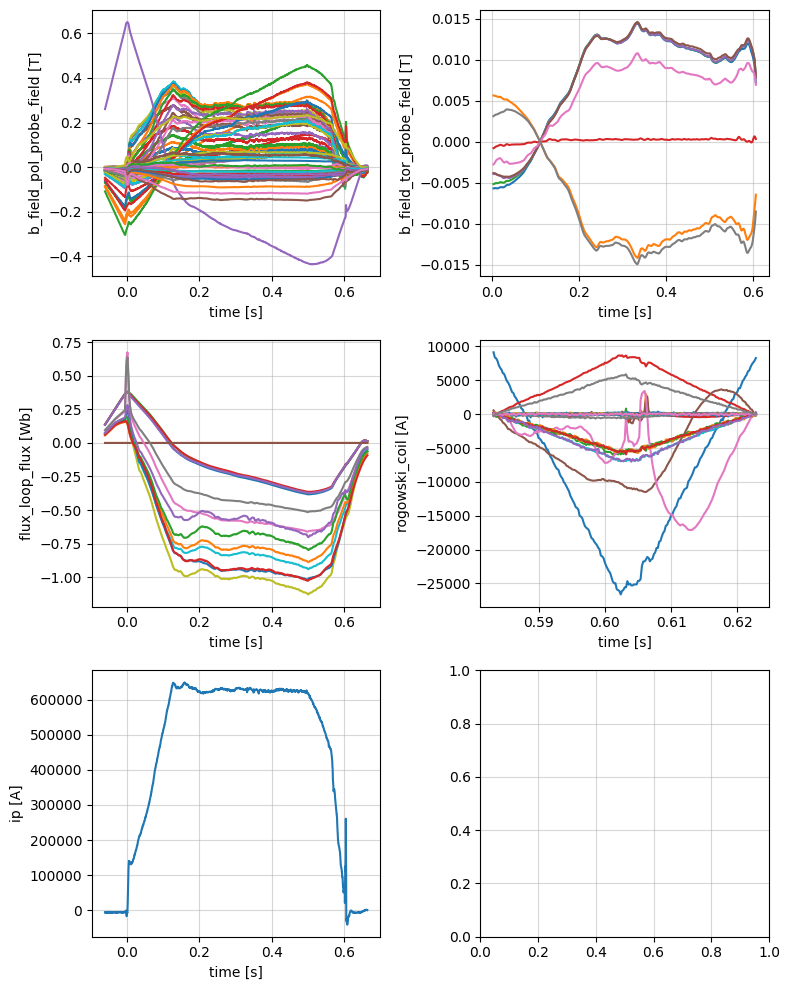

In [63]:
profiles = xr.open_zarr(store, group='magnetics')

fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

profiles['b_field_pol_probe_field'].plot.line(x='time', ax=axes[0], add_legend=False)
profiles['b_field_tor_probe_field'].plot.line(x='time', ax=axes[1], add_legend=False)
profiles['flux_loop_flux'].plot.line(x='time', ax=axes[2], add_legend=False)
profiles['rogowski_coil'].plot.line(x='time', ax=axes[3], add_legend=False)
profiles['ip'].plot.line(x='time', ax=axes[4], add_legend=False)

for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()

profiles

### Magnetics (OMAHA)

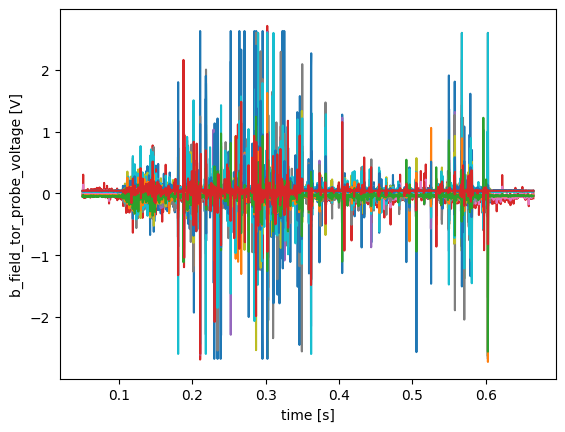

In [24]:
profiles = xr.open_zarr(store, group='magnetics_omaha')
profiles['b_field_tor_probe_voltage'].plot.line(x='time', add_legend=False)

### Spectrometer Visible

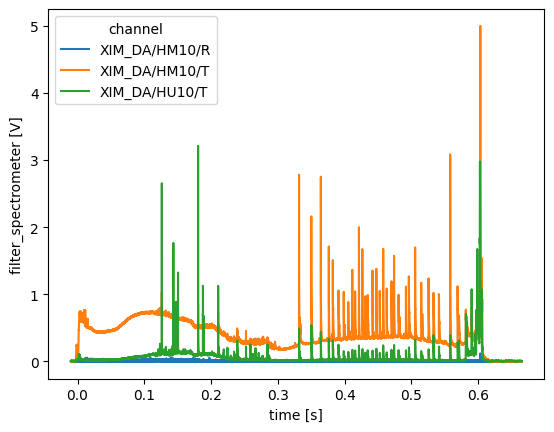

In [26]:
profiles = xr.open_zarr(store, group='spectrometer_visible')
profiles['filter_spectrometer'].plot.line(x='time')

### Soft X-rays

<xarray.Dataset> Size: 160MB
Dimensions:                       (horizontal_cam_lower_channel: 18,
                                   time: 363201,
                                   horizontal_cam_upper_channel: 18,
                                   tangential_cam_channel: 18)
Coordinates:
  * horizontal_cam_lower_channel  (horizontal_cam_lower_channel) <U14 1kB '/x...
  * horizontal_cam_upper_channel  (horizontal_cam_upper_channel) <U14 1kB '/x...
  * tangential_cam_channel        (tangential_cam_channel) <U12 864B '/xsx/TC...
  * time                          (time) float64 3MB -0.0612 -0.0612 ... 0.6652
Data variables:
    horizontal_cam_lower          (horizontal_cam_lower_channel, time) float64 52MB dask.array<chunksize=(3, 45401), meta=np.ndarray>
    horizontal_cam_upper          (horizontal_cam_upper_channel, time) float64 52MB dask.array<chunksize=(3, 45401), meta=np.ndarray>
    tangential_cam                (tangential_cam_channel, time) float64 52MB dask.array<chunksize=(3, 45401), meta=np.ndarray>
Attributes:
    description:  
    label:        Volt
    name:         soft_x_rays
    uda_name:     /xsx/TCAM/1
    units:        V

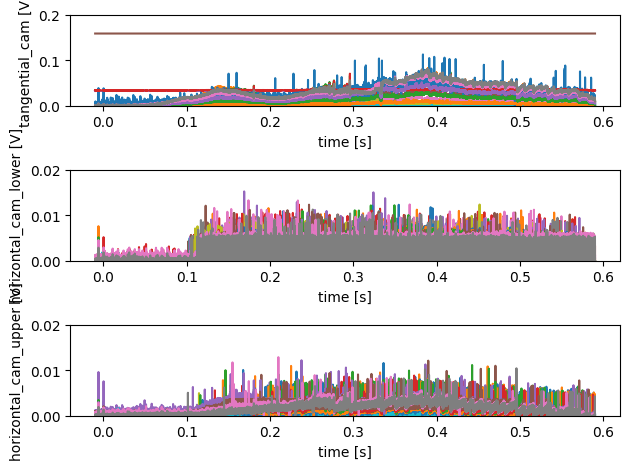

In [31]:
profiles = xr.open_zarr(store, group='soft_x_rays')
fig, axes = plt.subplots(3, 1)

profiles['tangential_cam'].plot.line(x='time', ax=axes[0], add_legend=False)
axes[0].set_ylim(0, 0.2)

profiles['horizontal_cam_lower'].plot.line(x='time', ax=axes[1], add_legend=False)
axes[1].set_ylim(0, 0.02)

profiles['horizontal_cam_upper'].plot.line(x='time', ax=axes[2], add_legend=False)
axes[2].set_ylim(0, 0.02)

plt.tight_layout()
profiles

### Thomson Profiles

<xarray.Dataset> Size: 425kB
Dimensions:       (major_radius: 120, time: 146)
Coordinates:
  * major_radius  (major_radius) float64 960B 0.3 0.31 0.32 ... 1.47 1.48 1.49
  * time          (time) float64 1kB -0.0612 -0.0562 -0.0512 ... 0.6588 0.6638
Data variables:
    n_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    n_e_core      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    p_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    t_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    t_e_core      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
Attributes:
    description:  
    label:        core temperature
    name:         thomson_scattering
    uda_name:     AYC_TE_CORE
    units:        eV

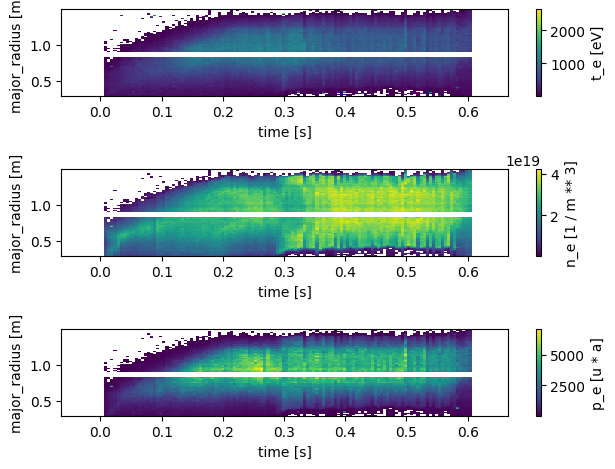

In [33]:
profiles = xr.open_zarr(store, group='thomson_scattering')
profiles

fig, axes = plt.subplots(3, 1)
axes = axes.flatten()
profiles.t_e.plot(x='time', y='major_radius', ax=axes[0])
profiles.n_e.plot(x='time', y='major_radius', ax=axes[1])
profiles.p_e.plot(x='time', y='major_radius', ax=axes[2])
plt.tight_layout()

profiles

<xarray.Dataset> Size: 425kB
Dimensions:       (major_radius: 120, time: 146)
Coordinates:
  * major_radius  (major_radius) float64 960B 0.3 0.31 0.32 ... 1.47 1.48 1.49
  * time          (time) float64 1kB -0.0612 -0.0562 -0.0512 ... 0.6588 0.6638
Data variables:
    n_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    n_e_core      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    p_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    t_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    t_e_core      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
Attributes:
    description:  
    label:        core temperature
    name:         thomson_scattering
    uda_name:     AYC_TE_CORE
    units:        eV

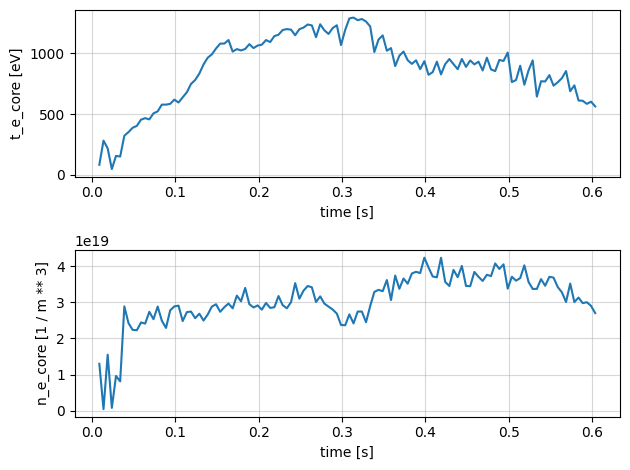

In [34]:
fig, axes = plt.subplots(2, 1)
profiles['t_e_core'].plot(x='time', ax=axes[0])
profiles['n_e_core'].plot(x='time', ax=axes[1])
for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()
profiles

### CXRS Profiles

<xarray.Dataset> Size: 189kB
Dimensions:       (major_radius: 160, time: 73)
Coordinates:
  * major_radius  (major_radius) float64 1kB 0.0 0.01 0.02 ... 1.57 1.58 1.59
  * time          (time) float64 584B -0.0612 -0.0512 -0.0412 ... 0.6488 0.6588
Data variables:
    t_i           (time, major_radius) float64 93kB dask.array<chunksize=(73, 160), meta=np.ndarray>
    v_i           (time, major_radius) float64 93kB dask.array<chunksize=(73, 160), meta=np.ndarray>
Attributes:
    description:  
    imas:         charge_exchange.channel[:].ion[:].t_i
    label:        Carbon temperature
    name:         charge_exchange
    uda_name:     ACT_SS_TEMPERATURE
    units:        eV

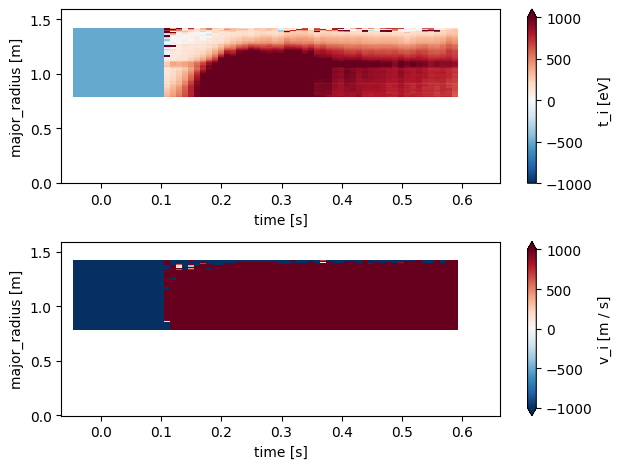

In [35]:
profiles = xr.open_zarr(store, group='charge_exchange')

fig, axes = plt.subplots(2, 1)
profiles['t_i'].plot(x='time', y='major_radius', ax=axes[0], vmax=1000)
profiles['v_i'].plot(x='time', y='major_radius', ax=axes[1], vmax=1000)
plt.tight_layout()
profiles

### Equilibrium

<xarray.Dataset> Size: 10MB
Dimensions:                   (time: 146, z: 65, major_radius: 65,
                               n_boundary_coords: 139, n_x_points: 4,
                               profile_r: 65)
Coordinates:
  * major_radius              (major_radius) float64 520B 0.06 0.09 ... 1.98
  * n_boundary_coords         (n_boundary_coords) float32 556B 0.0 1.0 ... 138.0
  * n_x_points                (n_x_points) <U16 256B 'EFM_XPOINT1_R(C)' ... '...
  * profile_r                 (profile_r) float32 260B 0.0 0.01562 ... 1.0
  * time                      (time) float64 1kB -0.0612 -0.0562 ... 0.6638
  * z                         (z) float32 260B -2.0 -1.938 -1.875 ... 1.938 2.0
Data variables: (12/35)
    beta_normal               (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    beta_pol                  (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    beta_tor                  (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    boundary_elongation_axis  (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    bphi_rmag                 (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    bvac_rmag                 (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    ...                        ...
    triangularity_upper       (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    vloop_dynamic             (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    vloop_static              (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    whmd                      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    x_point_r                 (n_x_points, time) float64 5kB dask.array<chunksize=(4, 146), meta=np.ndarray>
    x_point_z                 (n_x_points, time) float64 5kB dask.array<chunksize=(4, 146), meta=np.ndarray>
Attributes:
    description:  
    imas:         equilibrium.time_slice[:].profiles_1d.q
    label:        q(r) at z=0.
    name:         equilibrium
    uda_name:     EFM_Q(R)
    units:

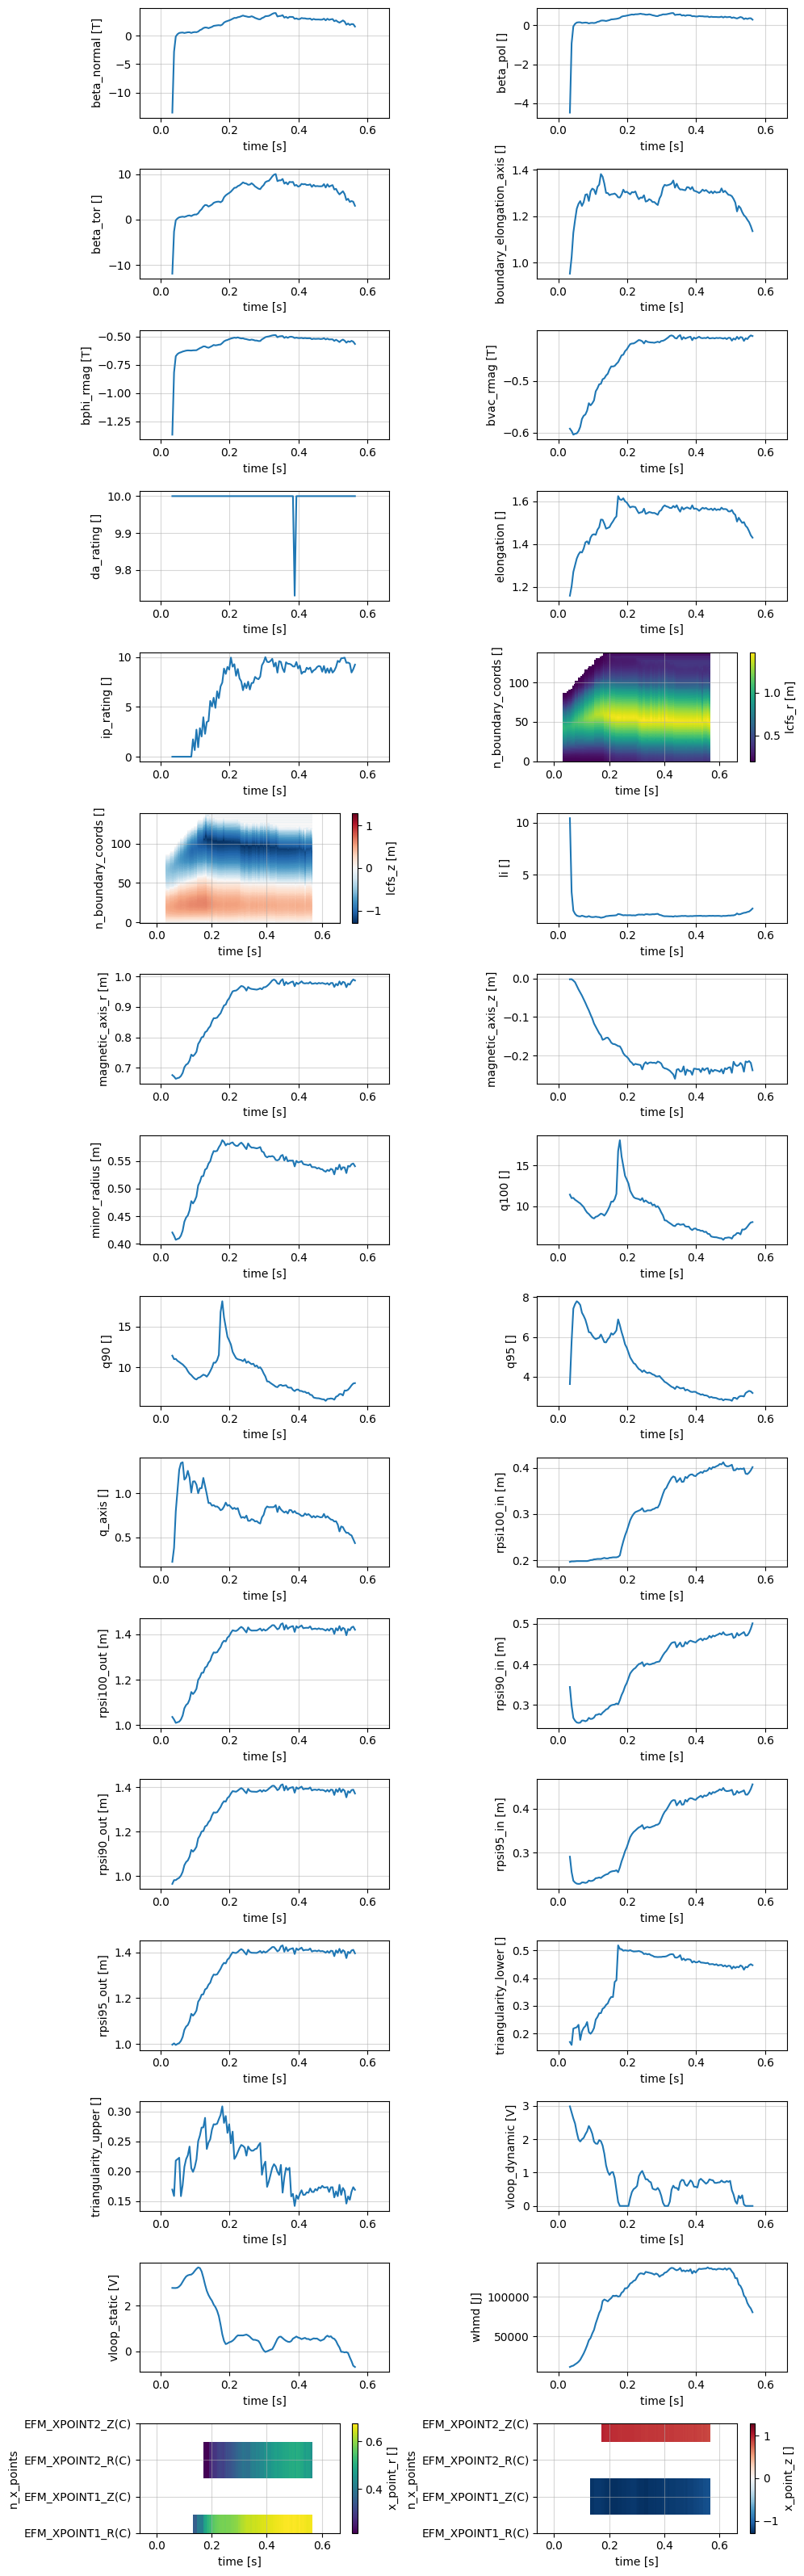

In [37]:
profiles = xr.open_zarr(store, group='equilibrium')

profile_1d = profiles.drop_vars(['j_tor', 'phi', 'q'])
plot_1d_profiles(profile_1d)

profiles

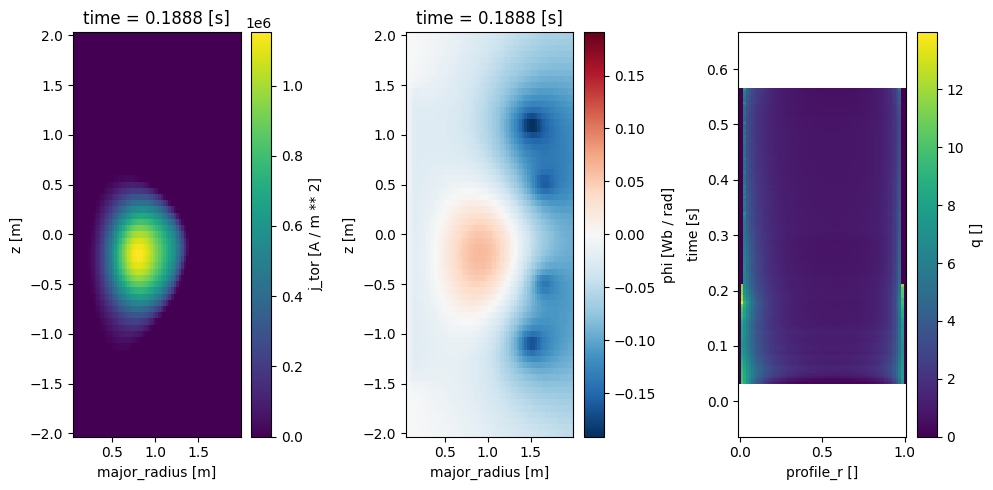

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

profiles['j_tor'].isel(time=50).plot(ax=axes[0])
profiles['phi'].isel(time=50).plot(ax=axes[1])
profiles['q'].plot(ax=axes[2])
plt.tight_layout()

### Cameras

<xarray.Dataset> Size: 3GB
Dimensions:   (time: 364, height_a: 912, width_a: 768, height_b: 448,
               width_b: 640)
Coordinates:
  * time      (time) float64 3kB -0.0612 -0.0592 -0.0572 ... 0.6628 0.6648
Dimensions without coordinates: height_a, width_a, height_b, width_b
Data variables:
    camera_a  (time, height_a, width_a) float64 2GB dask.array<chunksize=(23, 114, 96), meta=np.ndarray>
    camera_b  (time, height_b, width_b) float64 835MB dask.array<chunksize=(46, 56, 80), meta=np.ndarray>
Attributes: (12/36)
    CLASS:           IMAGE
    IMAGE_SUBCLASS:  IMAGE_INDEXED
    IMAGE_VERSION:   1.2
    board_temp:      0.0
    bottom:          1024
    camera:          
    ...              ...
    top:             113
    trigger:         -0.10000000149011612
    uda_name:        RBA
    vbin:            0
    view:            Hl07 floor mount + FFC2 + 25mm lens + CII filter
    width:           768

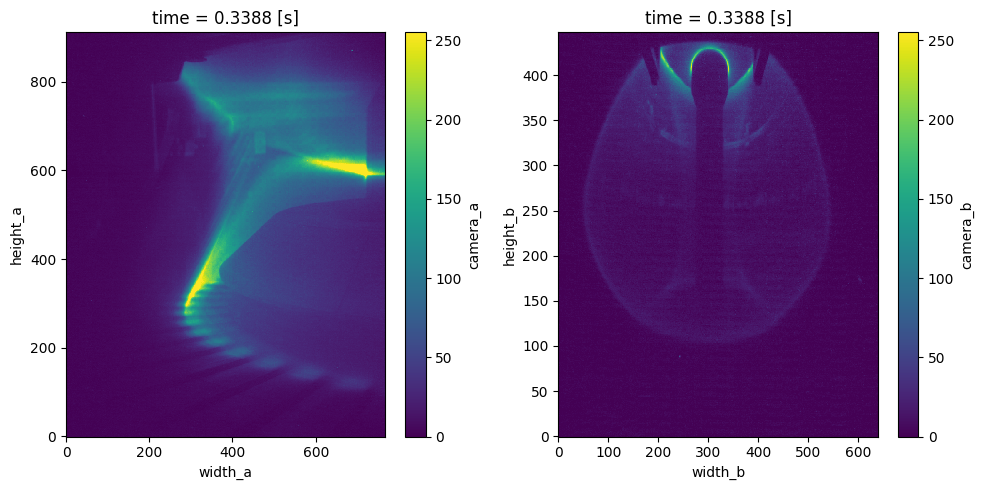

In [48]:
profiles = xr.open_zarr(store, group='camera_visible')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
profiles['camera_a'].isel(time=200).plot(ax=axes[0])
profiles['camera_b'].isel(time=200).plot(ax=axes[1])
plt.tight_layout()

profiles
